Dataset Description:

The dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc.

The target variable for this dataset is 'Loan_Status'.
We have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 

In [53]:
#Importing the dataset
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading the dataset
df=pd.read_csv('loan_predict.csv')

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
#Shape of the dataset
df.shape

(614, 13)

Rows-614

columns-13

In [6]:
#Checking the datatypes
df.dtypes    

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [7]:
#Checking for null values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
#Removing null values in the object column
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy='most_frequent')
df['Gender']=imp.fit_transform(df['Gender'].values.reshape(-1,1))
df['Married']=imp.fit_transform(df['Married'].values.reshape(-1,1))
df['Dependents']=imp.fit_transform(df['Dependents'].values.reshape(-1,1))
df['Self_Employed']=imp.fit_transform(df['Self_Employed'].values.reshape(-1,1))

In [11]:
#Removing null values from the float column
imp=SimpleImputer(strategy='median')
df['LoanAmount']=imp.fit_transform(df['LoanAmount'].values.reshape(-1,1))
df['Loan_Amount_Term']=imp.fit_transform(df['Loan_Amount_Term'].values.reshape(-1,1))
df['Credit_History']=imp.fit_transform(df['Credit_History'].values.reshape(-1,1))

In [12]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Null values are removed using mode and median

In [13]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [23]:
#Encoding the object type columns using Label Encoder
from sklearn.preprocessing import LabelEncoder
df['Gender']=LabelEncoder().fit_transform(df['Gender'])
df['Loan_ID']=LabelEncoder().fit_transform(df['Loan_ID'])
df['Married']=LabelEncoder().fit_transform(df['Married'])
df['Education']=LabelEncoder().fit_transform(df['Education'])
df['Property_Area']=LabelEncoder().fit_transform(df['Property_Area'])
df['Loan_Status']=LabelEncoder().fit_transform(df['Loan_Status'])
df['Self_Employed']=LabelEncoder().fit_transform(df['Self_Employed'])
df['Dependents']=LabelEncoder().fit_transform(df['Dependents'])

In [24]:
df.dtypes      #Checking the datatypes

Loan_ID                int64
Gender                 int64
Married                int64
Dependents             int32
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object

In [25]:
df['Dependents'].value_counts()

0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000007487EDF880>,
      dtype=object)

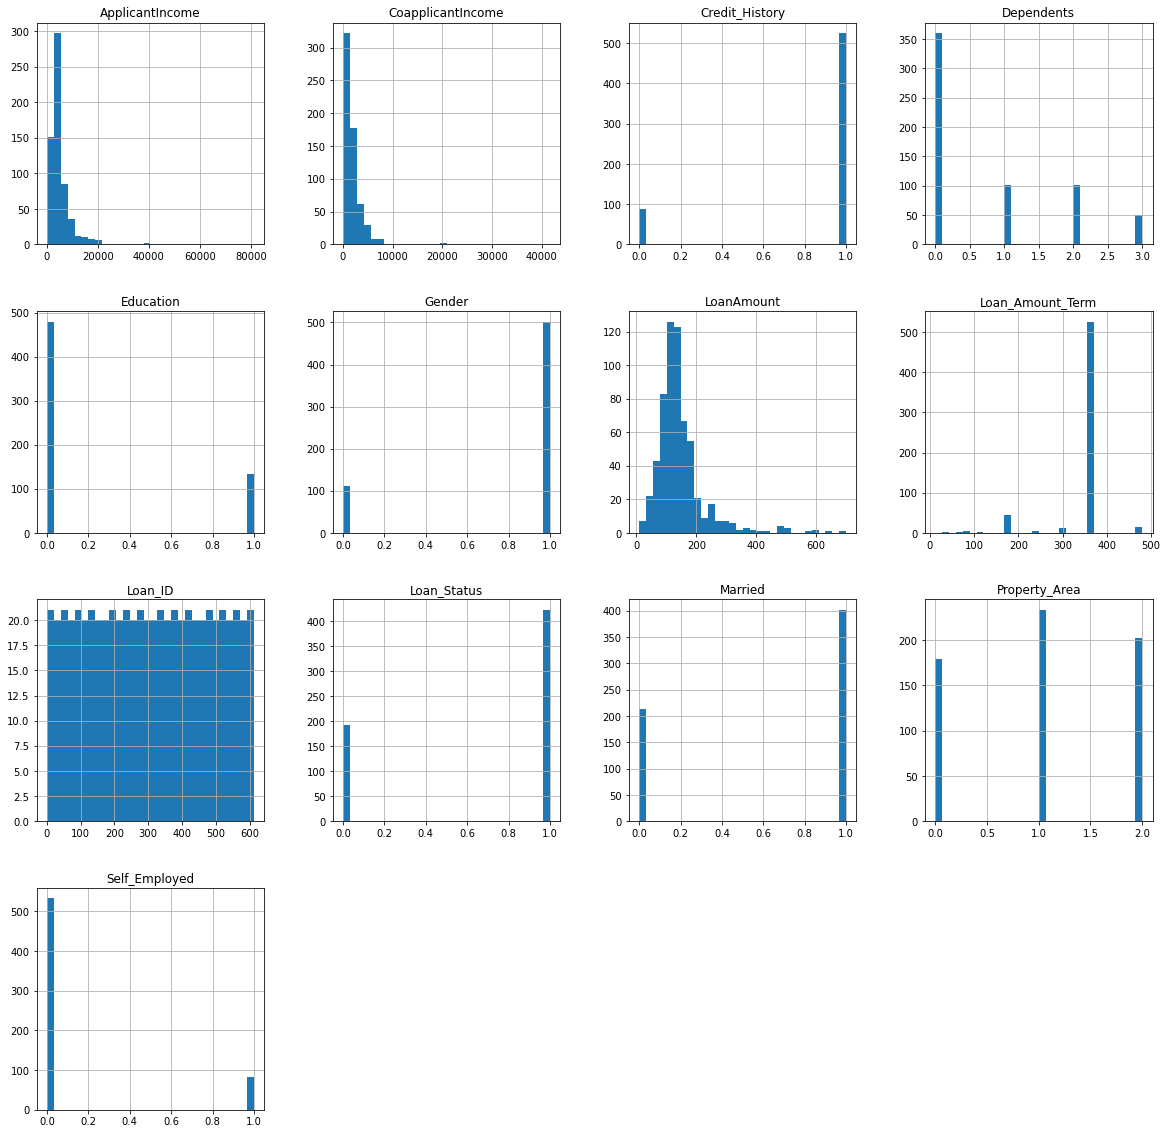

In [27]:
#Data Visualization
df.hist(figsize=(20,20),grid=True,layout=(4,4),bins=30)

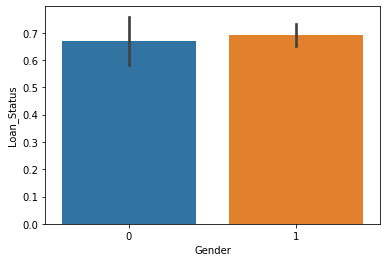

In [28]:
sns.barplot(x='Gender',y='Loan_Status',data=df)

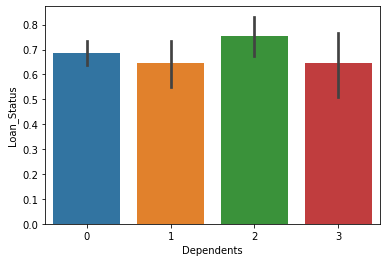

In [29]:
sns.barplot(x='Dependents',y='Loan_Status',data=df)

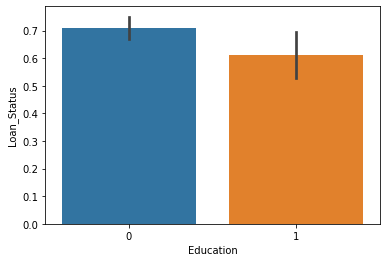

In [30]:
sns.barplot(x='Education',y='Loan_Status',data=df)

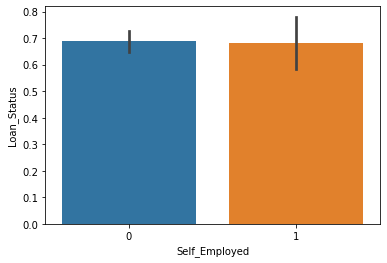

In [32]:
sns.barplot(x='Self_Employed',y='Loan_Status',data=df)

In [34]:
df.describe().T     #Statistical summary of the dataset

,count,mean,std,min,25%,50%,75%,max
Loan_ID,614.0,306.500000,177.390811,0.0,153.25,306.5,459.75,613.0
Gender,614.0,0.817590,0.386497,0.0,1.00,1.0,1.00,1.0
Married,614.0,0.653094,0.476373,0.0,0.00,1.0,1.00,1.0
Dependents,614.0,0.744300,1.009623,0.0,0.00,0.0,1.00,3.0
Education,614.0,0.218241,0.413389,0.0,0.00,0.0,0.00,1.0
Self_Employed,614.0,0.133550,0.340446,0.0,0.00,0.0,0.00,1.0
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.50,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.00,1188.5,2297.25,41667.0
LoanAmount,614.0,145.752443,84.107233,9.0,100.25,128.0,164.75,700.0
Loan_Amount_Term,614.0,342.410423,64.428629,12.0,360.00,360.0,360.00,480.0


In [35]:
#Checking the correlation 
df.corr()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,1.000000,-0.028029,-0.016013,0.051559,0.039442,0.032874,0.016925,0.039211,0.036872,-0.033028,-0.030603,-0.155416,0.011773
Gender,-0.028029,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.106904,-0.074030,0.009170,-0.025752,0.017987
Married,-0.016013,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.146546,-0.100912,0.010938,0.004257,0.091478
Dependents,0.051559,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.163103,-0.103864,-0.040160,-0.000244,0.010118
Education,0.039442,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.168759,-0.073928,-0.073658,-0.065243,-0.085884
Self_Employed,0.032874,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.115100,-0.033739,-0.001550,-0.030860,-0.003700
ApplicantIncome,0.016925,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.565181,-0.046531,-0.018615,-0.009500,-0.004710
CoapplicantIncome,0.039211,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.189218,-0.059383,0.011134,0.010522,-0.059187
LoanAmount,0.036872,0.106904,0.146546,0.163103,-0.168759,0.115100,0.565181,0.189218,1.000000,0.036960,-0.000607,-0.046632,-0.033214
Loan_Amount_Term,-0.033028,-0.074030,-0.100912,-0.103864,-0.073928,-0.033739,-0.046531,-0.059383,0.036960,1.000000,-0.004705,-0.076120,-0.022549


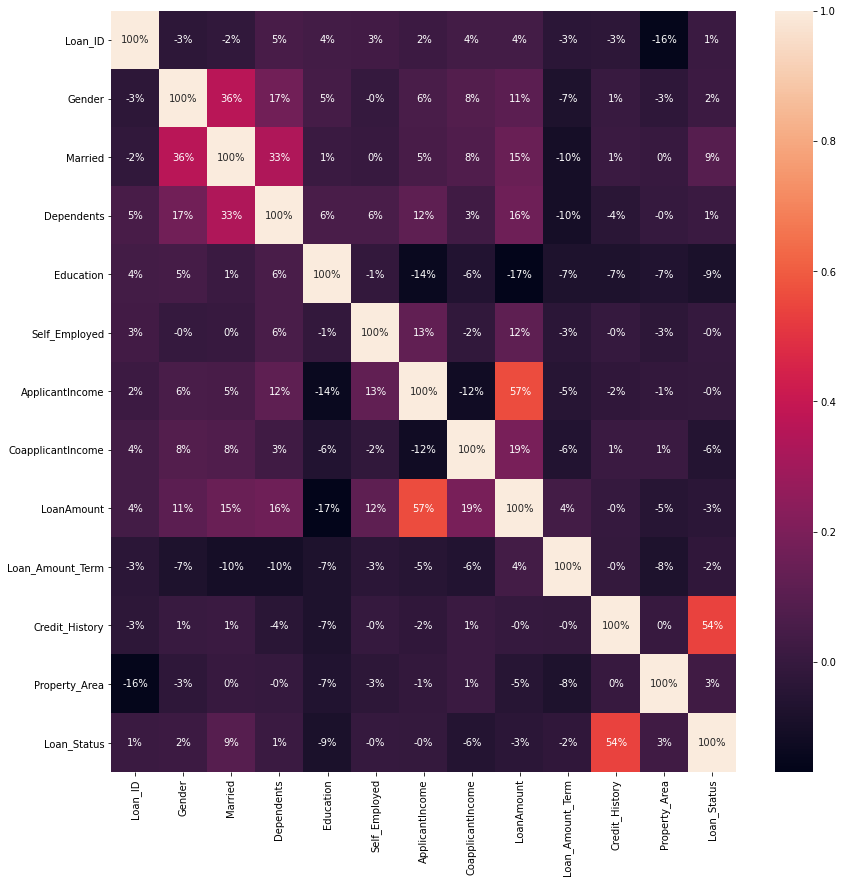

In [36]:
#Visualizing the correlation using heatmap
plt.figure(figsize=(14,14))  
sns.heatmap(df.corr(), annot=True, fmt='.0%')

'Credit_History' is highly correlated with the target variable 'Loan_Status'.

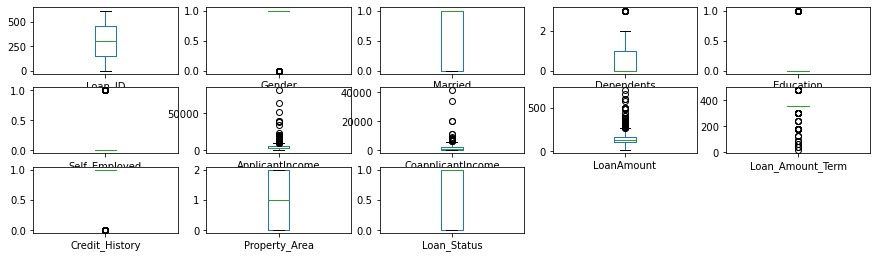

In [38]:
#Checking for outliers using boxplots
df.plot(kind='box',subplots=True,layout=(7,5),figsize=(15,10));

From above image we can clearly see that there are number of black dots in most of the column which are referring to the outliers, so it means most of the data are outside the distribution.

Now we will remove them using zscore

In [39]:
#Applying zscore
z=np.abs(zscore(df))
print(z)

[[1.72923217 0.47234264 1.37208932 ... 0.41173269 1.22329839 0.67451931]
 [1.7235903  0.47234264 0.72881553 ... 0.41173269 1.31851281 1.48253724]
 [1.71794844 0.47234264 0.72881553 ... 0.41173269 1.22329839 0.67451931]
 ...
 [1.71794844 0.47234264 0.72881553 ... 0.41173269 1.22329839 0.67451931]
 [1.7235903  0.47234264 0.72881553 ... 0.41173269 1.22329839 0.67451931]
 [1.72923217 2.11710719 1.37208932 ... 2.42876026 0.04760721 1.48253724]]


In [40]:
threshold=3
print(np.where(z<3))
print(df.shape)

(array([  0,   0,   0, ..., 613, 613, 613], dtype=int64), array([ 0,  1,  2, ..., 10, 11, 12], dtype=int64))
(614, 13)


In [41]:
#Assign the value to df_new which are less than threshold value and removing outliers
df_new=df[(z<3).all(axis=1)]

In [42]:
print(df.shape)
print(df_new.shape)
df=df_new
print('Shape after removing outliers:',df.shape)

(614, 13)
(577, 13)
Shape after removing outliers: (577, 13)


In [43]:
#%data loss calculation
loss_percent=(614-577)/614*100
print(loss_percent)

6.026058631921824


6% data is lost after removing outliers which is acceptable.

In [44]:
#Checking for the skewness in data
df.skew()

Loan_ID              0.010879
Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.151525
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

In [46]:
#Removing skewness using'log1p' method
skew=('ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History')
for col in skew:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

In [47]:
df.skew()

Loan_ID              0.010879
Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome     -0.204913
CoapplicantIncome   -0.216757
LoanAmount          -0.669196
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

Skewness in the data is minimised.

In [48]:
#Splitting the independent and target variable in x and y
x=df.drop('Loan_Status',axis=1)
y=df['Loan_Status']

In [49]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,8.674197,0.000000,4.859812,360.0,1.0,2,1
1,1,1,1,1,0,0,8.430327,7.319202,4.859812,360.0,1.0,0,0
2,2,1,1,0,0,1,8.006701,0.000000,4.204693,360.0,1.0,2,1
3,3,1,1,0,1,0,7.857094,7.765993,4.795791,360.0,1.0,2,1
4,4,1,0,0,0,0,8.699681,0.000000,4.955827,360.0,1.0,2,1


In [51]:
#Using StandardScaler to scale the data 
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=scale.fit_transform(x)

Model Building:

In [54]:
#Using multiple Algorithms for calculating the best algo which suits best for our data set
model=[LogisticRegression(),GaussianNB(),DecisionTreeClassifier(),KNeighborsClassifier(),SVC()]
max_accuracy_score=0
for r_state in range(40,90):
    train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=r_state,test_size=0.33)
    for i in model:
        i.fit(train_x,train_y)
        pre=i.predict(test_x)
        acc_sc=accuracy_score(test_y,pre)
        print('accuracy score correspond to random state',r_state,'is',acc_sc)
        if acc_sc>max_accuracy_score:
            max_accuracy_score=acc_sc
            final_state=r_state
            final_model=i
print()
print()
print()
print()
print('max accuracy score correspond to random state',final_state,'is',max_accuracy_score,'and model is',final_model)

accuracy score correspond to random state 40 is 0.8219895287958116
accuracy score correspond to random state 40 is 0.8219895287958116
accuracy score correspond to random state 40 is 0.6858638743455497
accuracy score correspond to random state 40 is 0.7643979057591623
accuracy score correspond to random state 40 is 0.8272251308900523
accuracy score correspond to random state 41 is 0.837696335078534
accuracy score correspond to random state 41 is 0.837696335078534
accuracy score correspond to random state 41 is 0.7120418848167539
accuracy score correspond to random state 41 is 0.7958115183246073
accuracy score correspond to random state 41 is 0.837696335078534
accuracy score correspond to random state 42 is 0.8324607329842932
accuracy score correspond to random state 42 is 0.837696335078534
accuracy score correspond to random state 42 is 0.7120418848167539
accuracy score correspond to random state 42 is 0.8167539267015707
accuracy score correspond to random state 42 is 0.8429319371727748

Above I am using for loop which helps me to provide the accuracy score at each random state and for the best state where accuracy score is maximum has come as output value.

The model is Logistic Regression with accuracy 88% at random state 68.

In [55]:
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=68,test_size=0.33)
LR=LogisticRegression()
LR.fit(train_x,train_y)
LR.score(train_x,train_y)
pred=LR.predict(test_x)
print(accuracy_score(test_y,pred))
print(confusion_matrix(test_y,pred))
print(classification_report(test_y,pred))

0.8795811518324608
[[ 26  20]
 [  3 142]]
              precision    recall  f1-score   support

           0       0.90      0.57      0.69        46
           1       0.88      0.98      0.93       145

    accuracy                           0.88       191
   macro avg       0.89      0.77      0.81       191
weighted avg       0.88      0.88      0.87       191



In [57]:
#Cross Validation
from sklearn.model_selection import cross_val_score
scr=cross_val_score(LR,x,y,cv=5)
print(scr.mean())

0.8180809595202397


The actual accuracy of the model is 82%.

Now we will do hyperparameter tuning of the model using GridSearchCV.

In [58]:
#Creating parameters list to pass in GridSearchCV
from sklearn.model_selection import GridSearchCV
LR=LogisticRegression()
c_space = np.logspace(-5, 8, 15)
param_grid = {'C':c_space} 
LR_cv = GridSearchCV(LR,param_grid,cv = 5)
LR_cv.fit(x,y)
best_parameters=LR_cv.best_params_
print(best_parameters)
best_result=LR_cv.best_score_
print(best_result)

{'C': 0.05179474679231213}
0.8180809595202397


The accuracy of the model (Logistic Regression) after GridSearchCV is also 82%.

In [60]:
#fitting the parameters in the model
LR=LogisticRegression(C=0.052)
LR.fit(train_x,train_y)

LogisticRegression(C=0.052)

In [61]:
#AUC ROC curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
LR.fit(train_x,train_y)
y_pred_prob=LR.predict_proba(test_x)[:,1]

In [62]:
y_pred_prob

array([0.66427224, 0.16900897, 0.727448  , 0.64074577, 0.78844404,
       0.79151232, 0.3368387 , 0.76551886, 0.69845901, 0.78827494,
       0.70462177, 0.71726231, 0.73884238, 0.73336388, 0.18579692,
       0.81802843, 0.77146665, 0.77143426, 0.7498735 , 0.60964624,
       0.67555617, 0.82736151, 0.77663417, 0.6669649 , 0.72069483,
       0.7784905 , 0.80145692, 0.70182986, 0.78336237, 0.71504092,
       0.78470889, 0.64834054, 0.70336895, 0.74654931, 0.22986483,
       0.80285693, 0.75209762, 0.31508149, 0.77378331, 0.77413203,
       0.71355782, 0.75305547, 0.30279895, 0.68238864, 0.77637216,
       0.77286519, 0.7793172 , 0.12942815, 0.75802103, 0.80594726,
       0.6773485 , 0.23060475, 0.76546202, 0.67212572, 0.80811537,
       0.72261656, 0.69154652, 0.6930814 , 0.73600114, 0.77268873,
       0.1209973 , 0.13898833, 0.71168888, 0.16921048, 0.56782446,
       0.7626775 , 0.76369476, 0.83866832, 0.63904768, 0.72924715,
       0.70241468, 0.71693804, 0.81222358, 0.60288387, 0.73004

In [63]:
fpr,tpr,thresholds=roc_curve(test_y,y_pred_prob)

In [64]:
fpr

array([0.        , 0.        , 0.        , 0.02173913, 0.02173913,
       0.06521739, 0.06521739, 0.08695652, 0.08695652, 0.10869565,
       0.10869565, 0.13043478, 0.13043478, 0.15217391, 0.15217391,
       0.17391304, 0.17391304, 0.19565217, 0.19565217, 0.2173913 ,
       0.2173913 , 0.23913043, 0.23913043, 0.26086957, 0.26086957,
       0.2826087 , 0.2826087 , 0.30434783, 0.30434783, 0.32608696,
       0.32608696, 0.36956522, 0.36956522, 0.39130435, 0.39130435,
       0.41304348, 0.41304348, 0.45652174, 0.45652174, 0.82608696,
       0.82608696, 0.95652174, 0.95652174, 1.        ])

In [65]:
tpr

array([0.        , 0.00689655, 0.0137931 , 0.0137931 , 0.16551724,
       0.16551724, 0.29655172, 0.29655172, 0.36551724, 0.36551724,
       0.37931034, 0.37931034, 0.40689655, 0.40689655, 0.43448276,
       0.43448276, 0.51724138, 0.51724138, 0.55172414, 0.55172414,
       0.64827586, 0.64827586, 0.66206897, 0.66206897, 0.8137931 ,
       0.8137931 , 0.82068966, 0.82068966, 0.83448276, 0.83448276,
       0.92413793, 0.92413793, 0.95862069, 0.95862069, 0.96551724,
       0.96551724, 0.97931034, 0.97931034, 0.9862069 , 0.9862069 ,
       0.99310345, 0.99310345, 1.        , 1.        ])

In [66]:
thresholds

array([1.88119484, 0.88119484, 0.84724036, 0.84446269, 0.80112897,
       0.79847315, 0.7793172 , 0.7787993 , 0.77268873, 0.77146665,
       0.76657578, 0.76551886, 0.7626775 , 0.76212158, 0.75964635,
       0.75802103, 0.74183918, 0.74135466, 0.73463037, 0.73336388,
       0.72069483, 0.7197372 , 0.71872653, 0.71726231, 0.68238864,
       0.68097025, 0.6773485 , 0.67555617, 0.67212572, 0.67018679,
       0.65092809, 0.65034589, 0.64074577, 0.63904768, 0.60964624,
       0.60288387, 0.58399002, 0.3368387 , 0.31508149, 0.16921048,
       0.16900897, 0.12333526, 0.1209973 , 0.1029641 ])

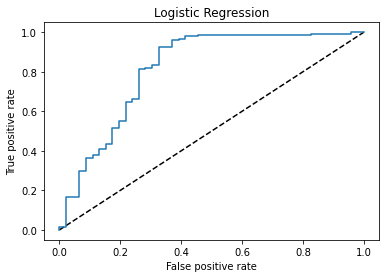

In [67]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Logistic Regression')
plt.show()

In [68]:
auc_score=roc_auc_score(test_y,LR.predict(test_x))
print(auc_score)

0.7722638680659671


The AUC-ROC curve helps us to visualize how well our machine learning classifier is performing.

In [69]:
import pickle
filename='loan_application_status.pkl'
pickle.dump(LR,open(filename,'wb'))